# Lab 02: Decision Tree
Group Members:
| **Student Name** | **Student ID** |
|:------------:|:----------:|
| Nguyễn Tấn Duy Anh | 22120015 |
| Bùi Hồng Phúc | 22120270 |
| Nguyễn Lê Anh Phúc | 22120276 |
| Hồ Minh Quang | 22120295 |

## Project Preparation
### Import libraries

In [1]:
%pip install scikit-learn ipython graphviz ucimlrepo
from IPython.display import clear_output, display
clear_output()

In [2]:
# Import libraries
import time
import numpy as np  # Random samples generator
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Import datasets

In [3]:
# Import dataset
from ucimlrepo import fetch_ucirepo

# Dataset 1
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id = 17)

# Dataset 2
# Fetch dataset
wine_quality = fetch_ucirepo(id = 186)

# Dataset 3
# Fetch dataset
dry_bean = fetch_ucirepo(id = 602)
proportions = [0.4, 0.6, 0.8, 0.9]

## Dataset 1 (Binary class)
### Preparation

In [4]:
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
subsets = []

for train_size in proportions:
    X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= train_size,stratify= y,random_state=42)
    subsets.append((X_train,X_test,y_train,y_test))

### Data Visualization

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


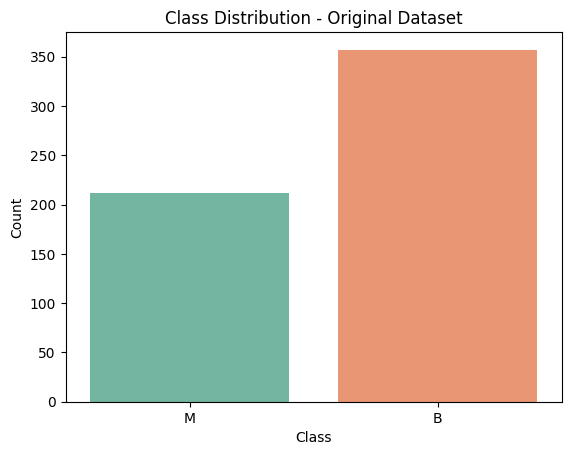

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


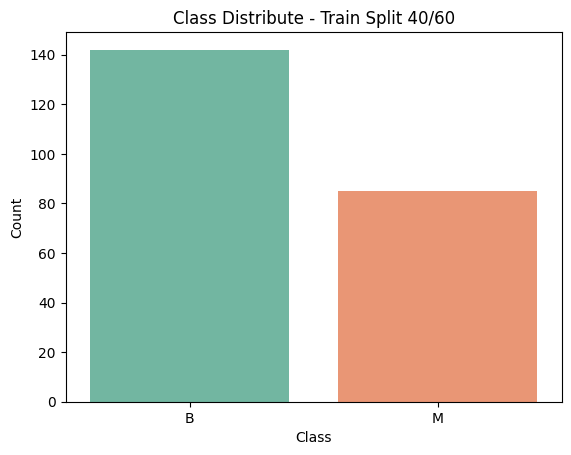

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


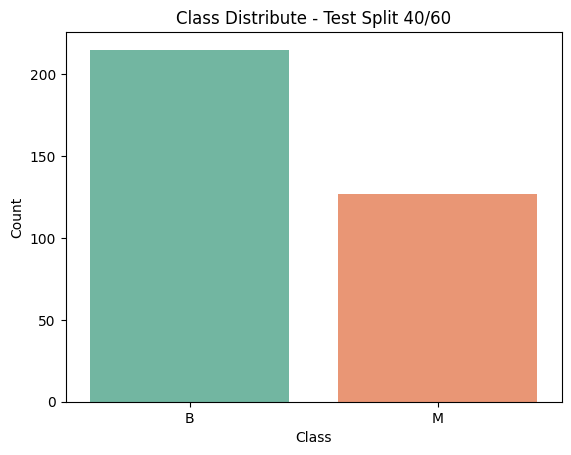

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


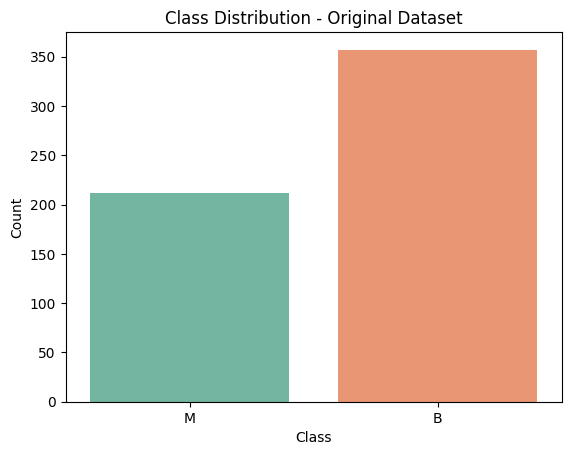

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


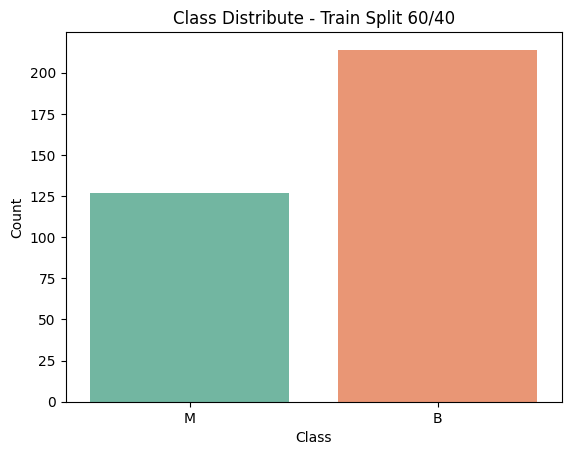

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


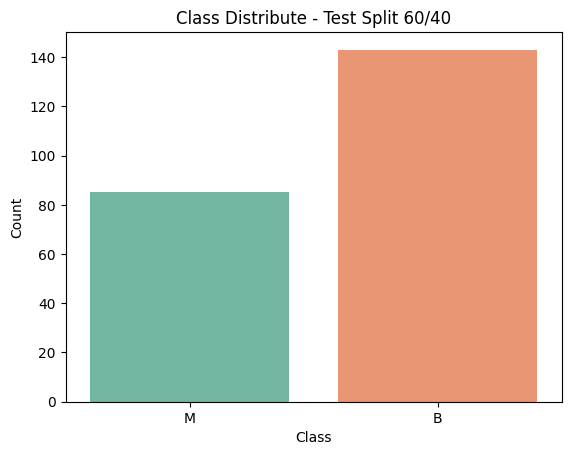

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


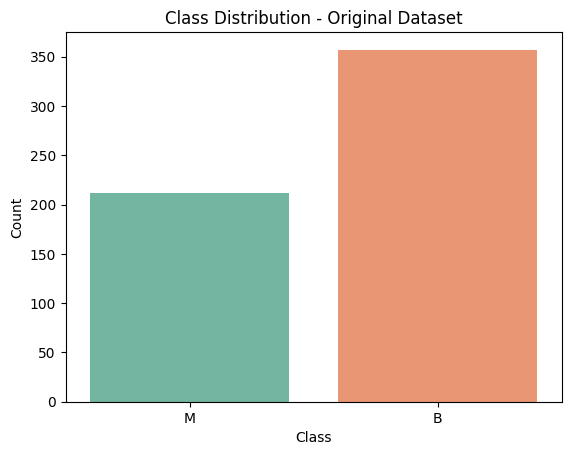

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


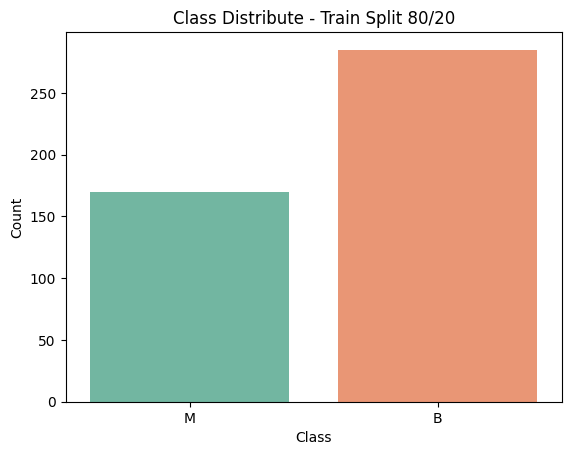

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


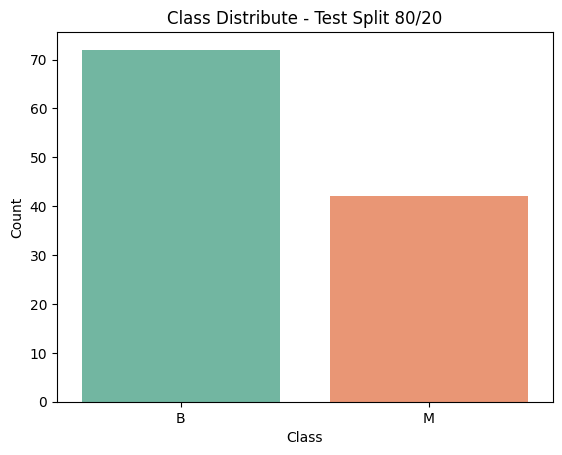

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


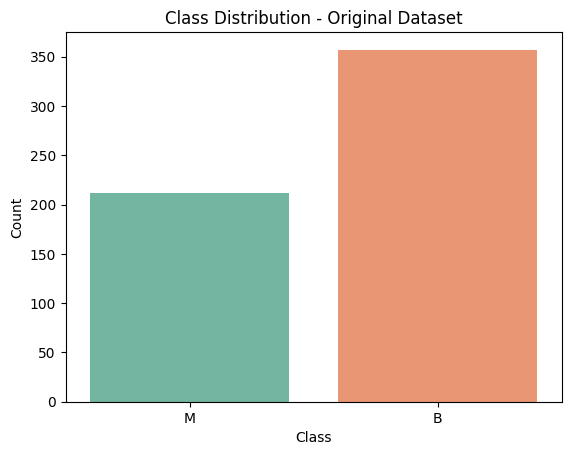

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


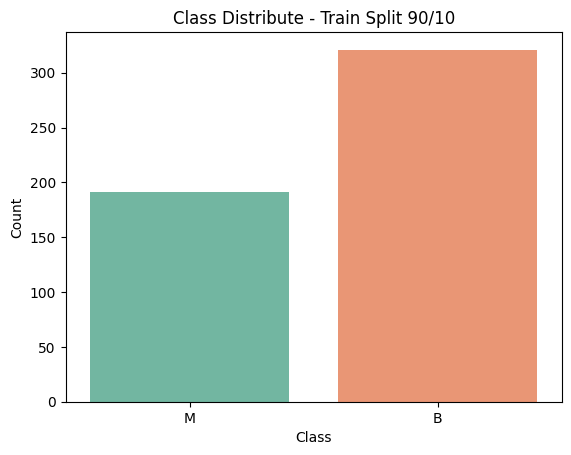

C:\Users\PC\AppData\Local\Temp\ipykernel_18732\3671997854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_data['Diagnosis'],palette='Set2')


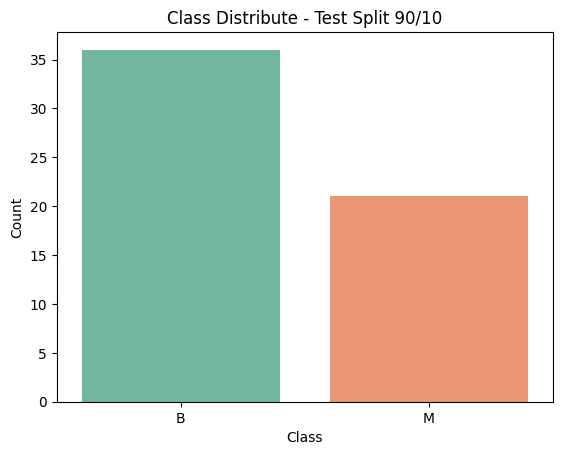

In [5]:
def visualize(y_data,title):
    sns.countplot(x = y_data['Diagnosis'],palette='Set2')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

for idx,(X_train,X_test,y_train,y_test) in enumerate(subsets):
    
    train_size = proportions[idx] * 100
    test_size = (1 - proportions[idx]) * 100
    visualize(y, 'Class Distribution - Original Dataset')
    visualize(y_train,f'Class Distribute - Train Split {train_size:.0f}/{test_size:.0f}')
    visualize(y_test,f'Class Distribute - Test Split {train_size:.0f}/{test_size:.0f}')


### Decision Tree Construction

Decision Tree: 40/60


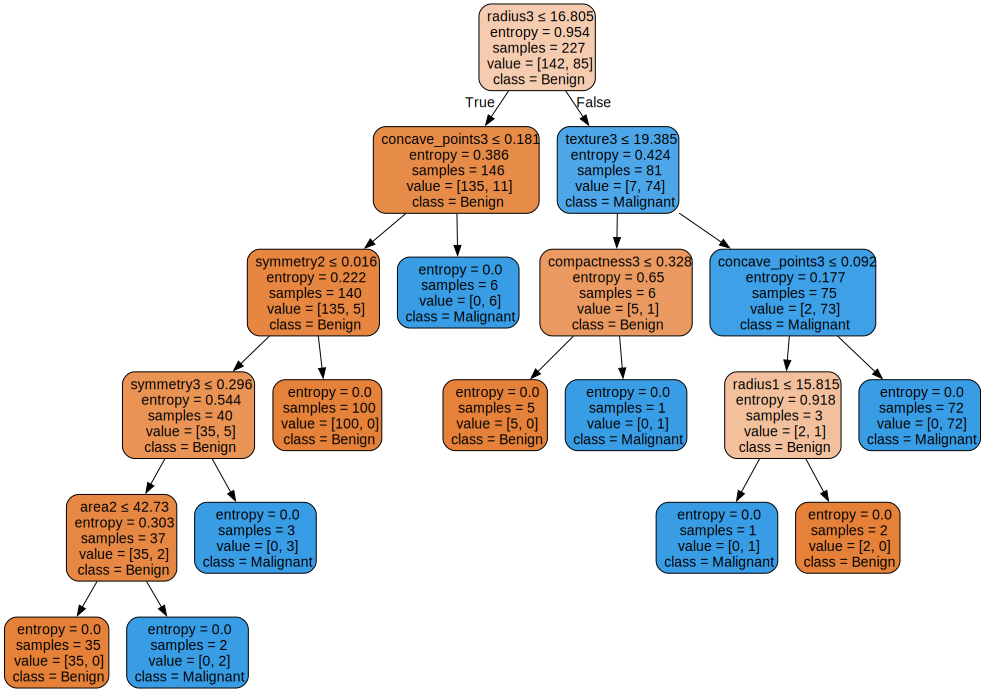

Decision Tree: 60/40


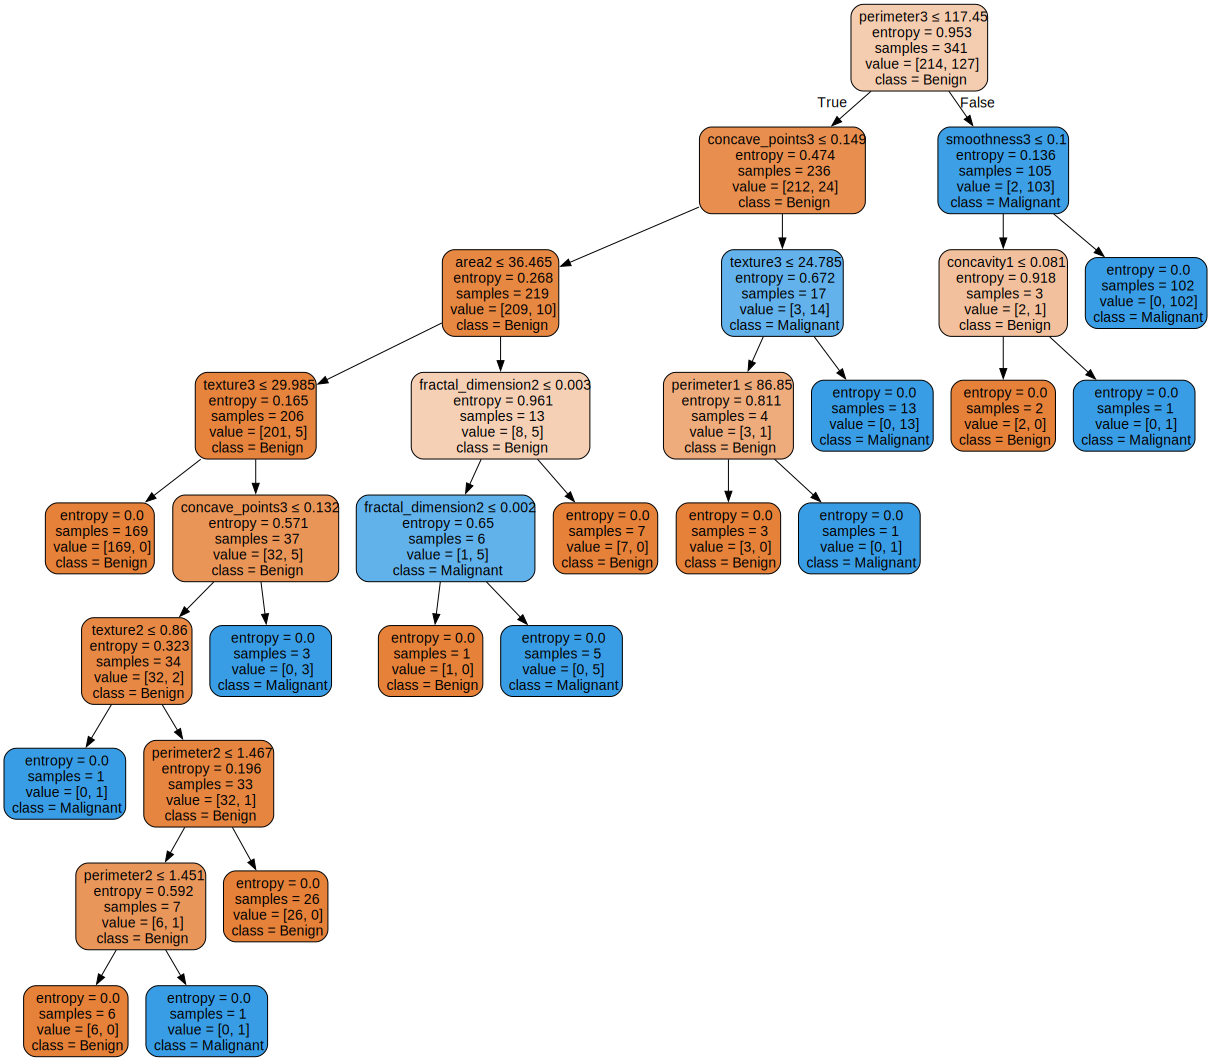

Decision Tree: 80/20


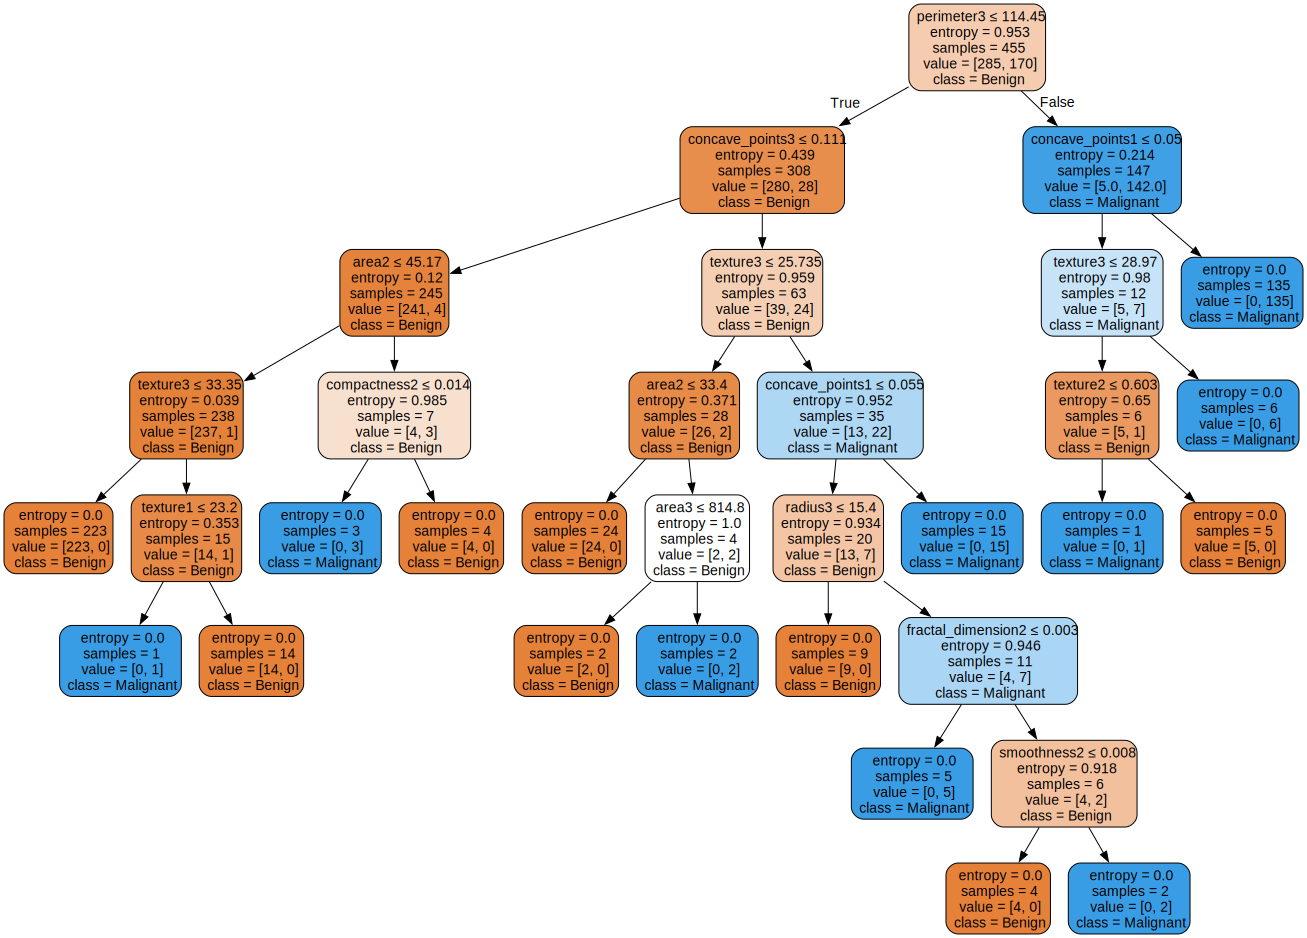

Decision Tree: 90/10


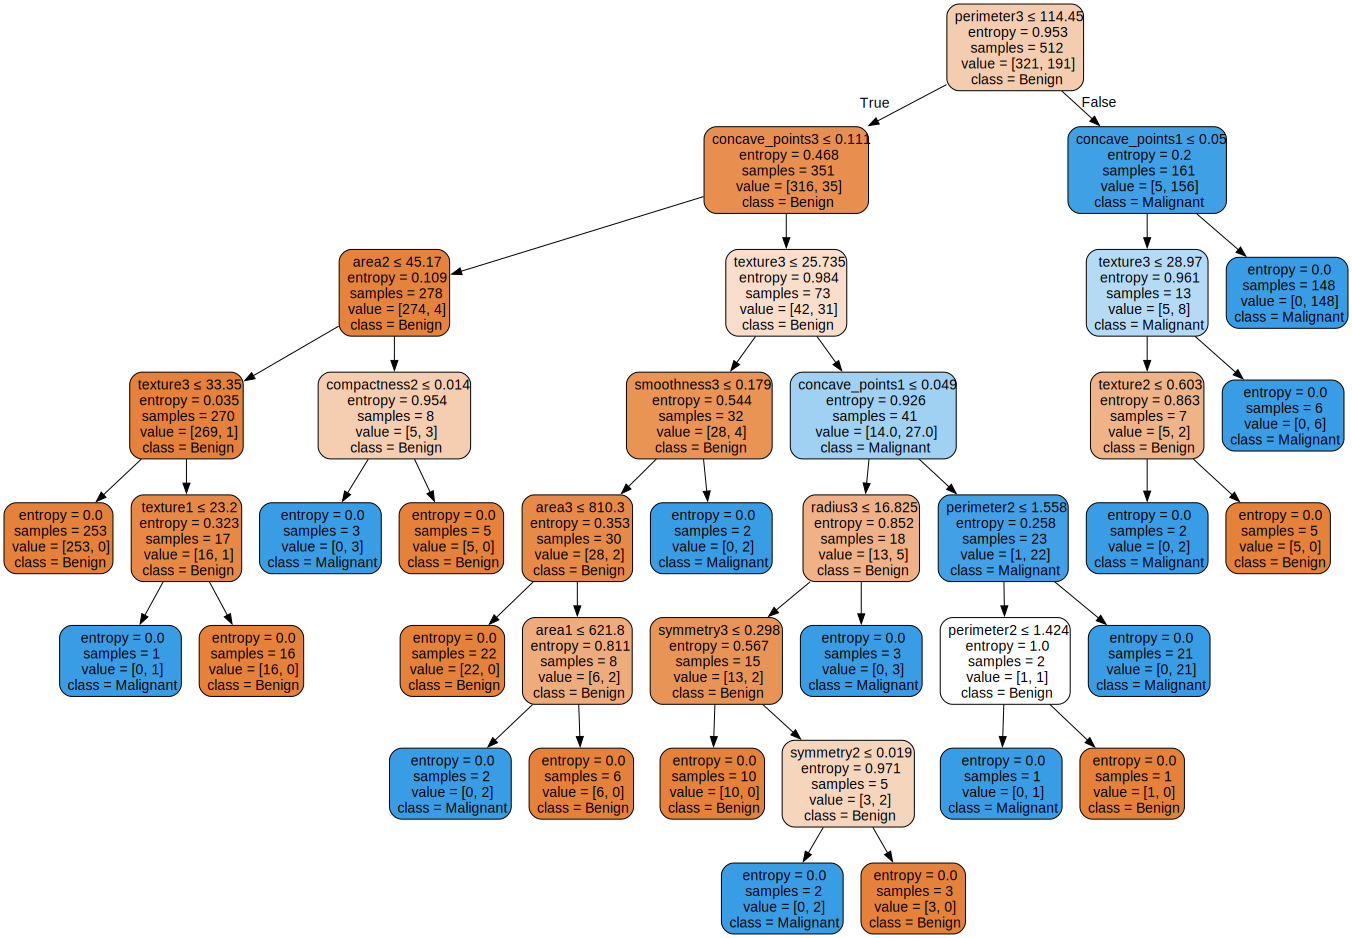

In [6]:
def build_visualize_tree(X_train,y_train,train_size,depth = None):
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth = depth)
    clf = clf.fit(X_train,y_train)

    dot_data = export_graphviz(clf,out_file = None,feature_names= X.columns,class_names= ['Benign','Malignant'],
                               filled= True,rounded = True,special_characters= True
                               )

    graph = graphviz.Source(dot_data)
    display(graph)

for idx,(X_train,X_test,y_train,y_test) in enumerate(subsets):
    train_size = proportions[idx]
    print(f'Decision Tree: {train_size*100:.0f}/{(1-train_size)*100:.0f}')
    build_visualize_tree(X_train,y_train,train_size)

### Evaluation

Evaluating the decision tree classifiers: 40/60
              precision    recall  f1-score   support

           B       0.91      0.96      0.93       215
           M       0.92      0.83      0.88       127

    accuracy                           0.91       342
   macro avg       0.91      0.90      0.90       342
weighted avg       0.91      0.91      0.91       342

[[206   9]
 [ 21 106]]


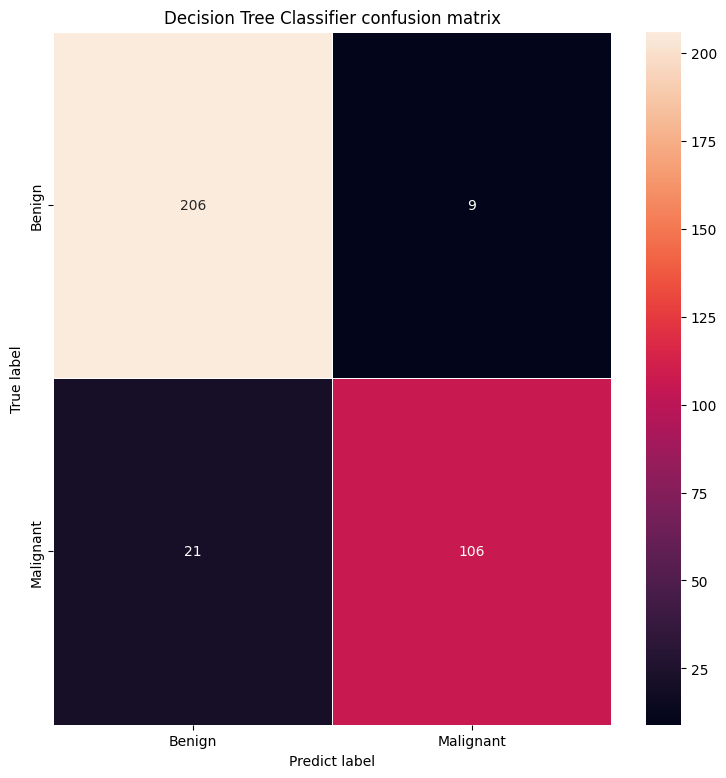

Evaluating the decision tree classifiers: 60/40
              precision    recall  f1-score   support

           B       0.94      0.96      0.95       143
           M       0.93      0.91      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228

[[137   6]
 [  8  77]]


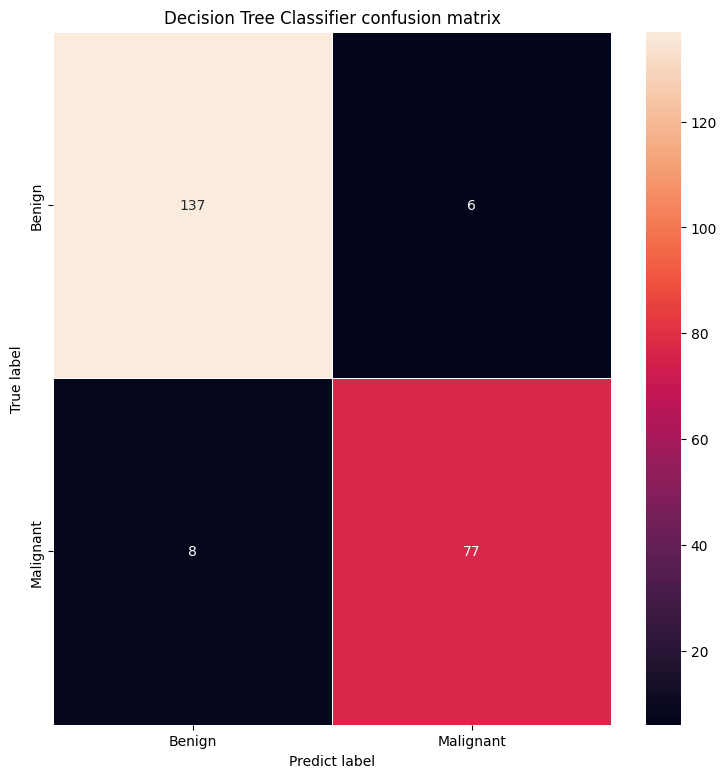

Evaluating the decision tree classifiers: 80/20
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[71  1]
 [ 4 38]]


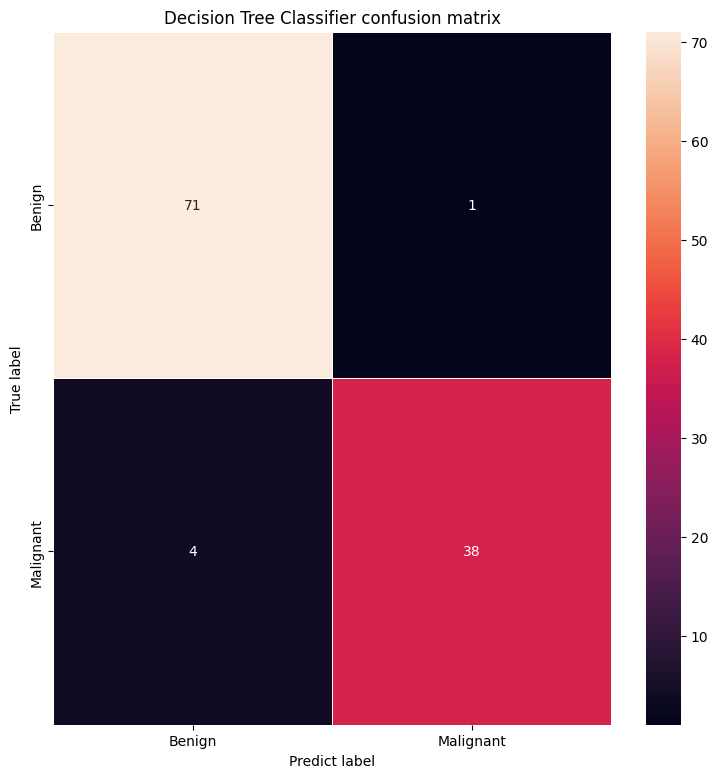

Evaluating the decision tree classifiers: 90/10
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        36
           M       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57

[[35  1]
 [ 2 19]]


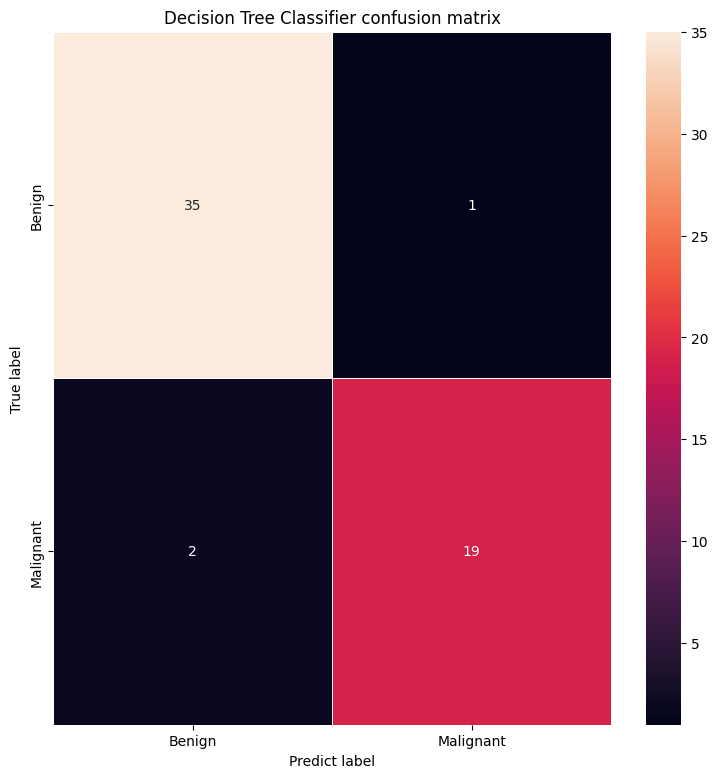

In [7]:
for idx,(X_train,X_test,y_train,y_test) in enumerate(subsets):
    train_size = proportions[idx]
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42)
    clf = clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    print(f'Evaluating the decision tree classifiers: {train_size*100:.0f}/{(1-train_size)*100:.0f}')
    print(classification_report(y_test,y_predict))
    cfm = confusion_matrix(y_test,y_predict)
    plt.figure(figsize=(9,9))
    sns.heatmap(cfm,annot=True,fmt ='d',linewidth=.5,xticklabels=["Benign","Malignant"],yticklabels=["Benign","Malignant"])
    plt.title('Decision Tree Classifier confusion matrix')
    plt.xlabel('Predict label')
    plt.ylabel('True label')
    print(cfm)
    plt.show()

### Depth and Accuracy Score

Depth = None


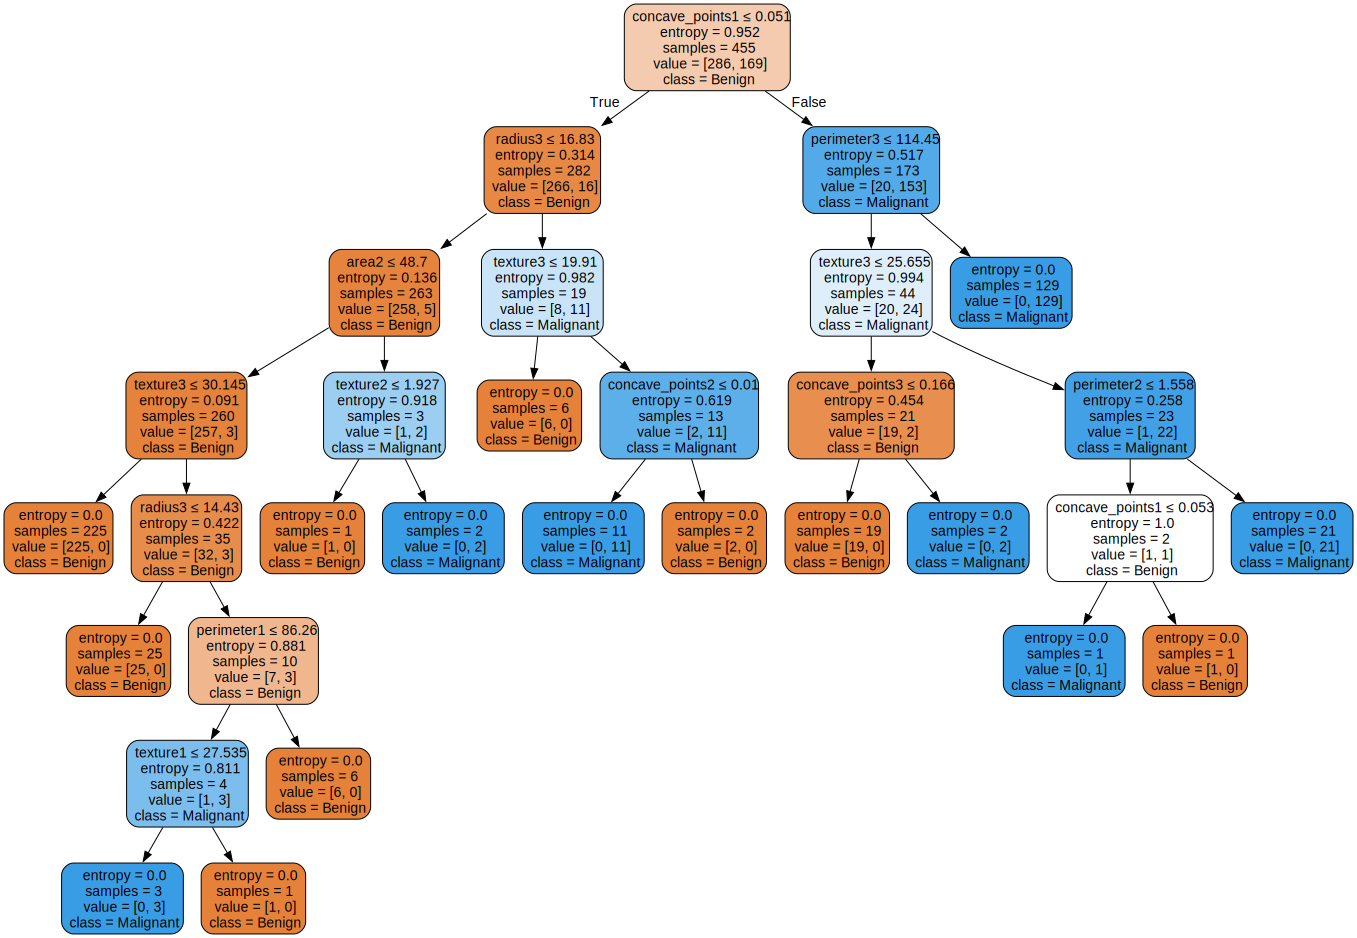

Depth = 2


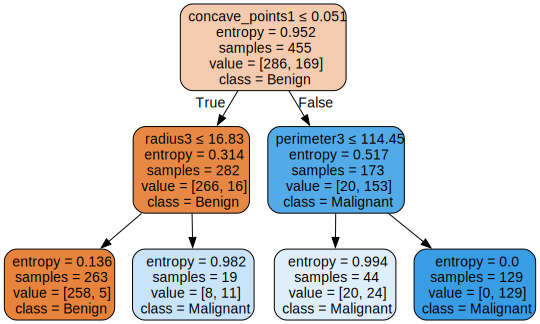

Depth = 3


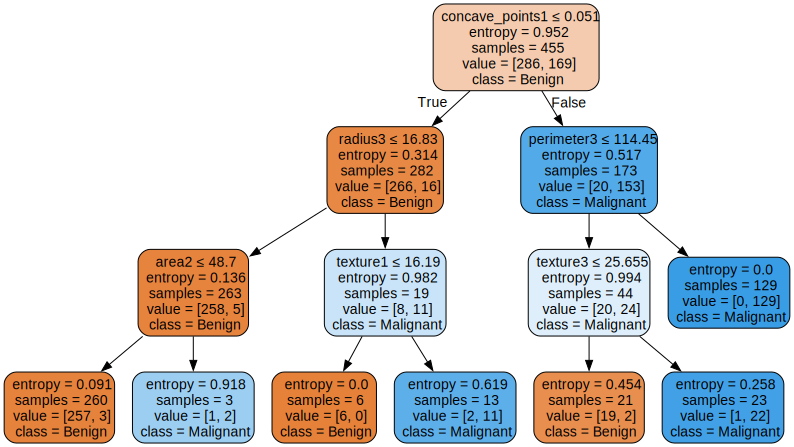

Depth = 4


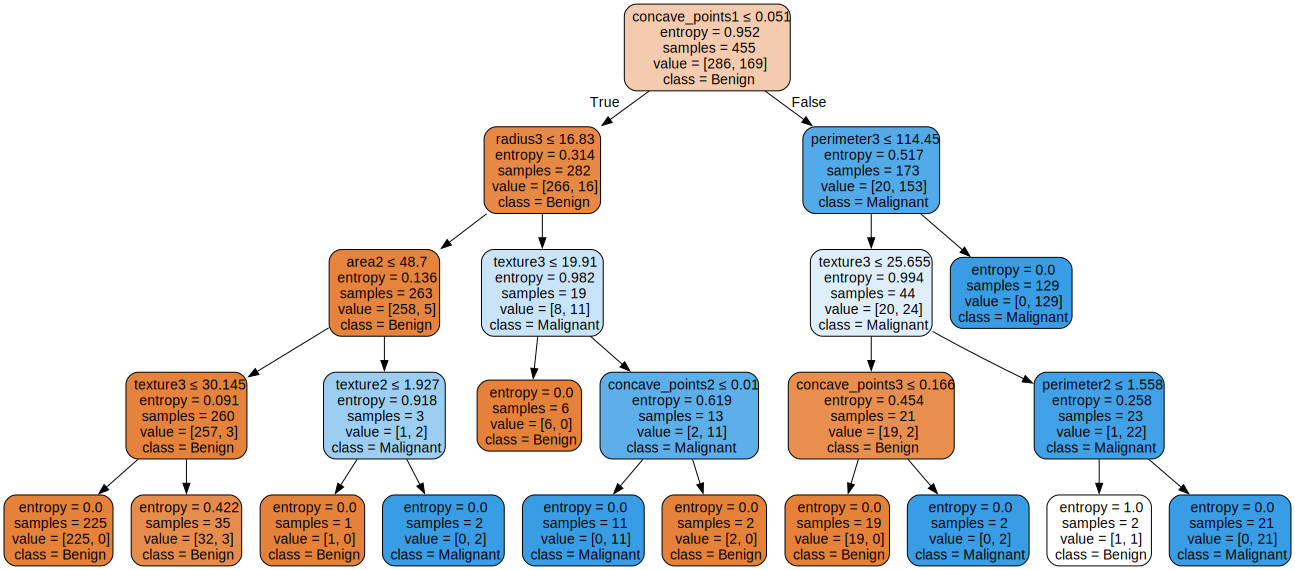

Depth = 5


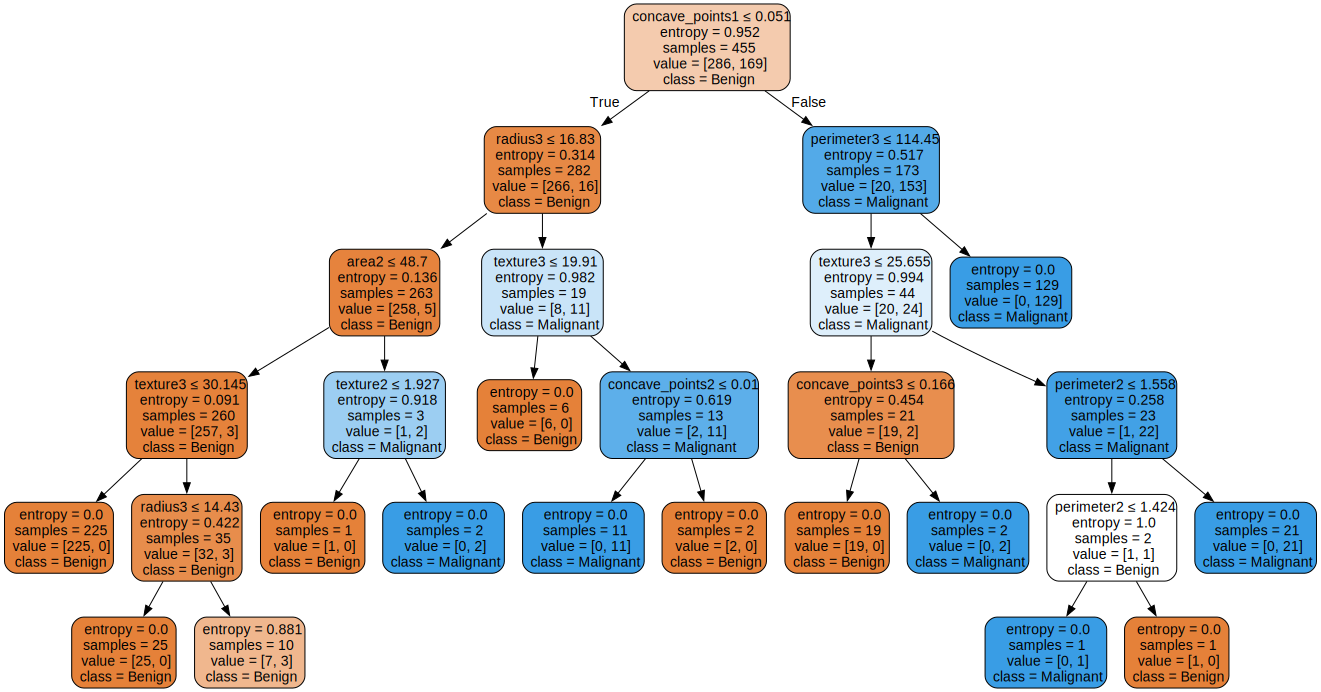

Depth = 6


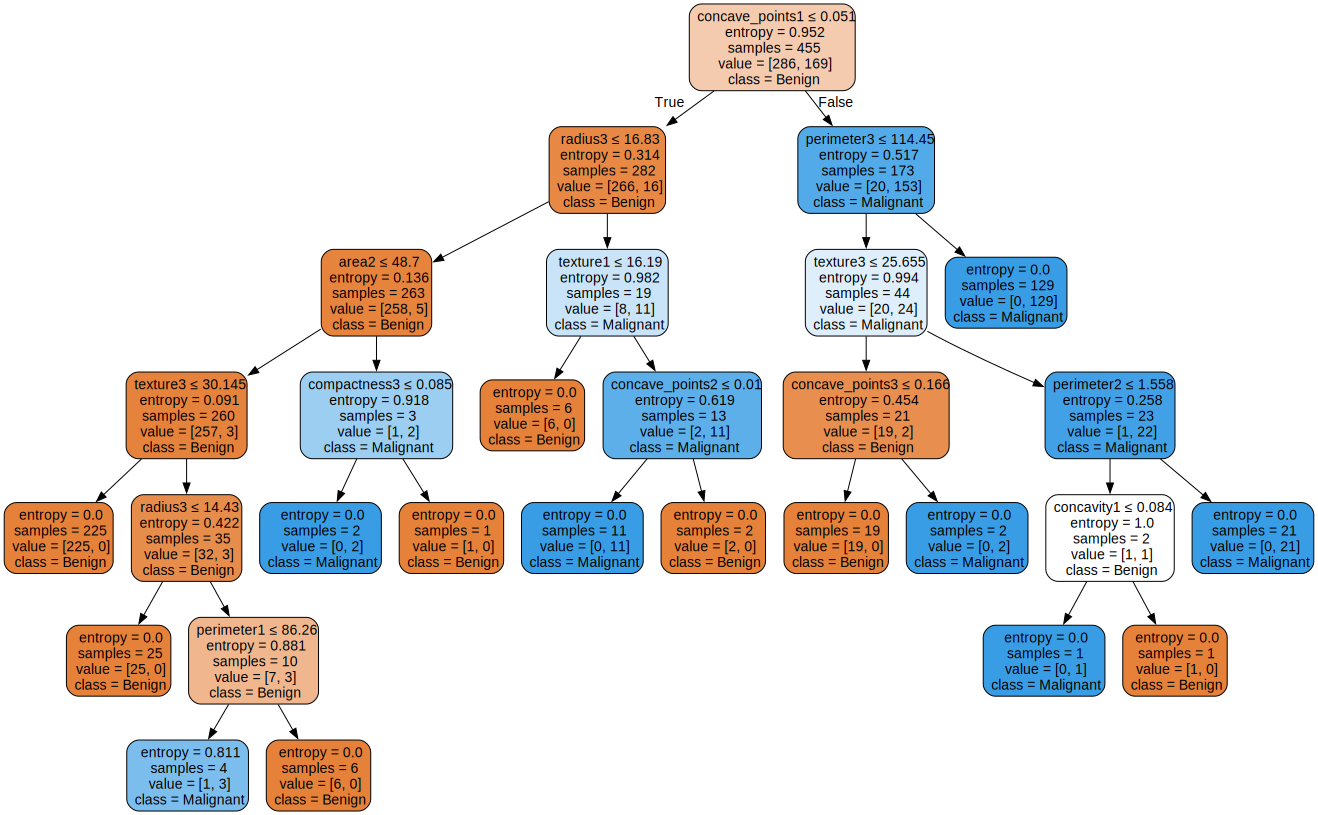

Depth = 7


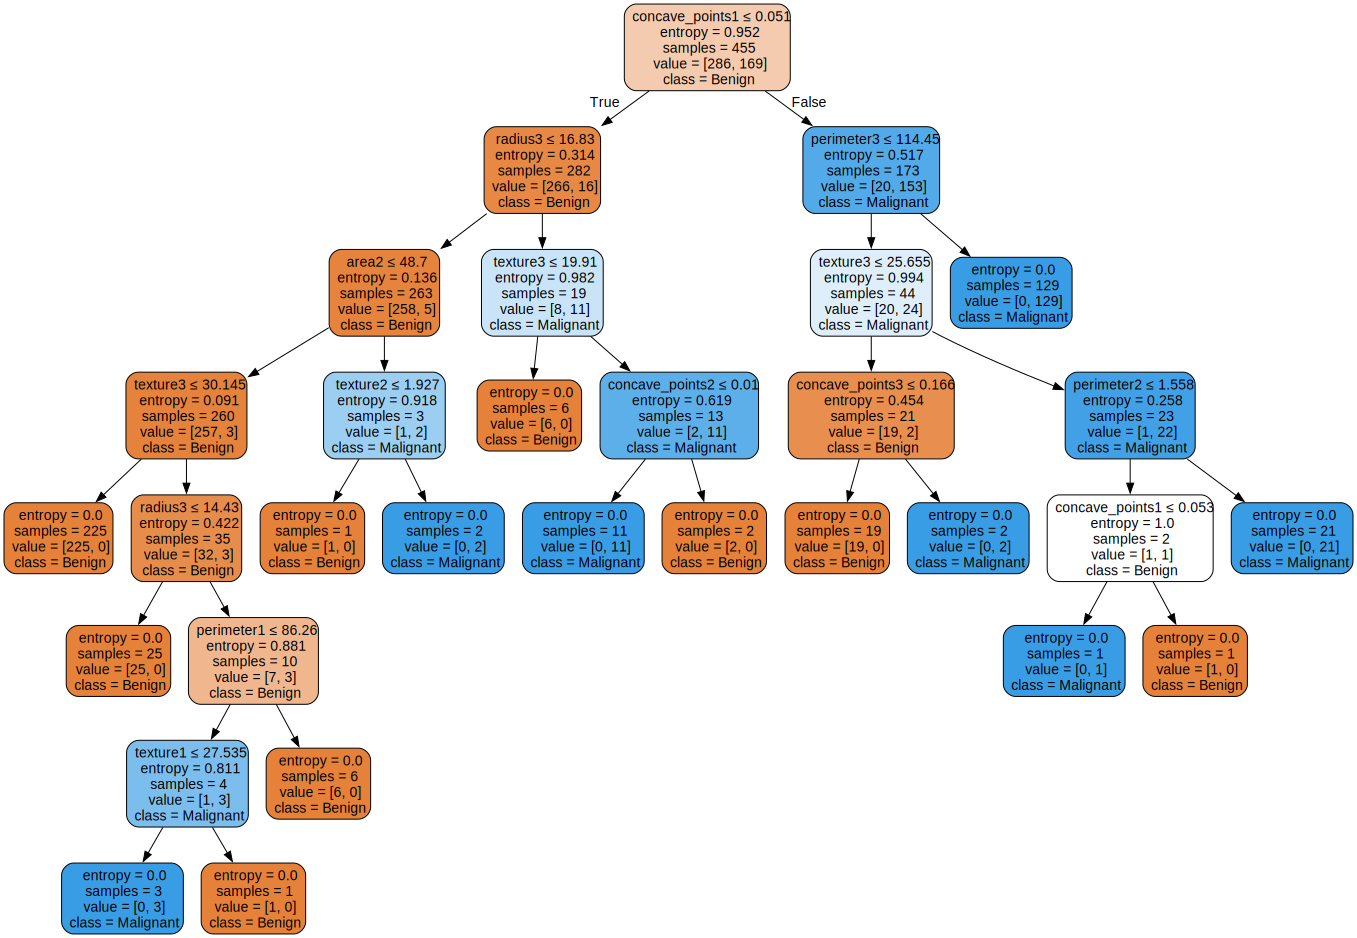

max_depth       NaN       2.0       3.0       4.0       5.0       6.0  \
accuracy   0.947368  0.912281  0.964912  0.947368  0.947368  0.947368   

max_depth       7.0  
accuracy   0.947368

In [8]:
max_depth = [None,2 ,3 ,4 ,5 ,6 ,7]
accuracy = []
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
for depth in max_depth:
    print(f'Depth = {depth}')
    build_visualize_tree(X_train,y_train,train_size=0.8, depth = depth)
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth= depth)
    clf = clf.fit(X_train,y_train)

    y_prec = clf.predict(X_test)

    accuracy.append(accuracy_score(y_test,y_prec))
    
results = pd.DataFrame({
    'max_depth': max_depth,
    'accuracy': accuracy
})
results = results.set_index('max_depth').T

display(results)

## Dataset 2 (Multi-class)
### Preparation

## Dataset 3 (Binary class)
### Preparation

In [9]:
features = dry_bean.data.features
targets = dry_bean.data.targets
labels = np.unique(targets)

# Optional checking, delete if unnecessary
raw_data = features.copy()
raw_data[targets.keys()] = targets

In [10]:
raw_data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0      28395    610.291       208.178117       173.888747     1.197191   
1      28734    638.018       200.524796       182.734419     1.097356   
2      29380    624.110       212.826130       175.931143     1.209713   
3      30008    645.884       210.557999       182.516516     1.153638   
4      30140    620.134       201.847882       190.279279     1.060798   
...      ...        ...              ...              ...          ...   
13606  42097    759.696       288.721612       185.944705     1.552728   
13607  42101    757.499       281.576392       190.713136     1.476439   
13608  42139    759.321       281.539928       191.187979     1.472582   
13609  42147    763.779       283.382636       190.275731     1.489326   
13610  42159    772.237       295.142741       182.204716     1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [11]:
# Columns description
dry_bean.variables

name     role         type demographic  \
0              Area  Feature      Integer        None   
1         Perimeter  Feature   Continuous        None   
2   MajorAxisLength  Feature   Continuous        None   
3   MinorAxisLength  Feature   Continuous        None   
4       AspectRatio  Feature   Continuous        None   
5      Eccentricity  Feature   Continuous        None   
6        ConvexArea  Feature      Integer        None   
7     EquivDiameter  Feature   Continuous        None   
8            Extent  Feature   Continuous        None   
9          Solidity  Feature   Continuous        None   
10        Roundness  Feature   Continuous        None   
11      Compactness  Feature   Continuous        None   
12     ShapeFactor1  Feature   Continuous        None   
13     ShapeFactor2  Feature   Continuous        None   
14     ShapeFactor3  Feature   Continuous        None   
15     ShapeFactor4  Feature   Continuous        None   
16            Class   Target  Categorical        None   

                                          description   units missing_values  
0   The area of a bean zone and the number of pixe...  pixels             no  
1   Bean circumference is defined as the length of...    None             no  
2   The distance between the ends of the longest l...    None             no  
3   The longest line that can be drawn from the be...    None             no  
4   Defines the relationship between MajorAxisLeng...    None             no  
5   Eccentricity of the ellipse having the same mo...    None             no  
6   Number of pixels in the smallest convex polygo...    None             no  
7   Equivalent diameter: The diameter of a circle ...    None             no  
8   The ratio of the pixels in the bounding box to...    None             no  
9   Also known as convexity. The ratio of the pixe...    None             no  
10  Calculated with the following formula: (4piA)/...    None             no  
11                Measures the roundness of an object    Ed/L             no  
12                                               None    None             no  
13                                               None    None             no  
14                                               None    None             no  
15                                               None    None             no  
16  (Seker, Barbunya, Bombay, Cali, Dermosan, Horo...    None             no

In [12]:
# Check for missing values
for col in raw_data.keys():
    print(col + f'\t{raw_data[col].isna().sum()}')

Area	0
Perimeter	0
MajorAxisLength	0
MinorAxisLength	0
AspectRatio	0
Eccentricity	0
ConvexArea	0
EquivDiameter	0
Extent	0
Solidity	0
Roundness	0
Compactness	0
ShapeFactor1	0
ShapeFactor2	0
ShapeFactor3	0
ShapeFactor4	0
Class	0


In [13]:
# Create subsets
batches = []
for train_prop in proportions:
    feature_train, feature_test, label_train, label_test = train_test_split(features, targets, train_size = train_prop, stratify = targets,
                                                                            random_state = np.uint64(np.random.rand() * 1024))
    batches.append((feature_train, label_train, feature_test, label_test))

### Data Visualization

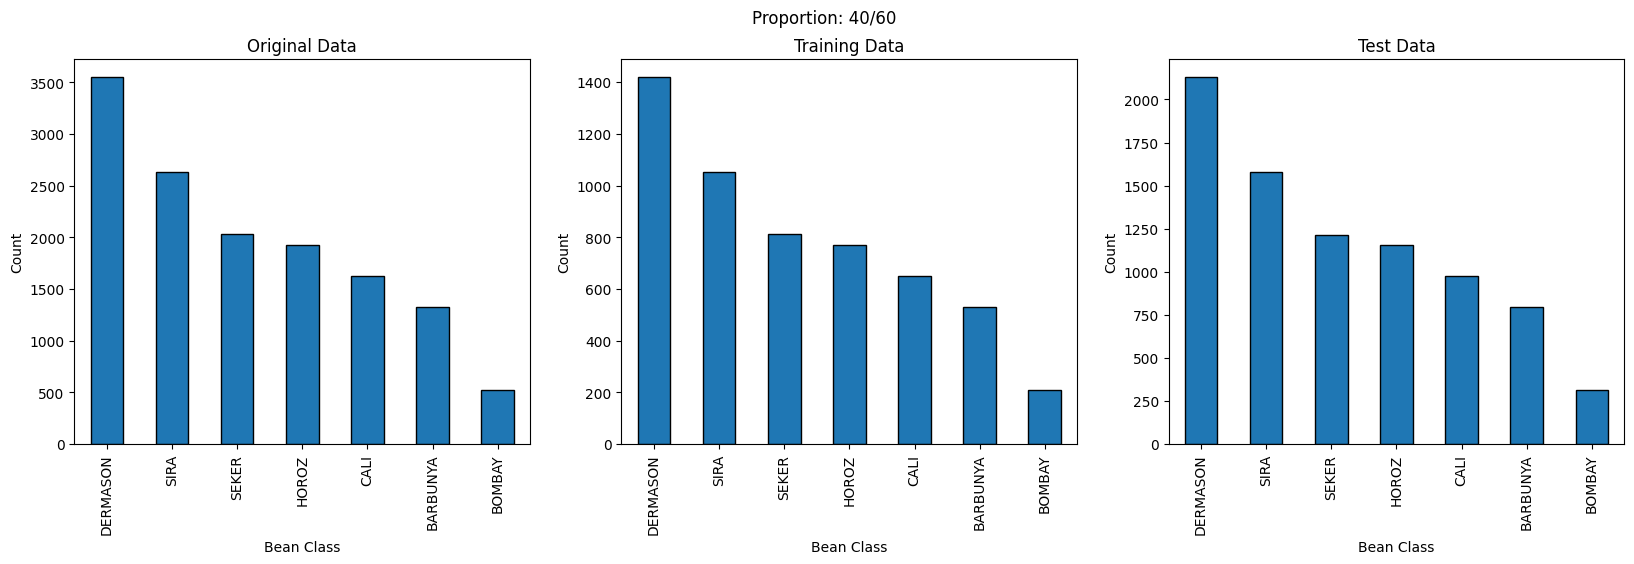

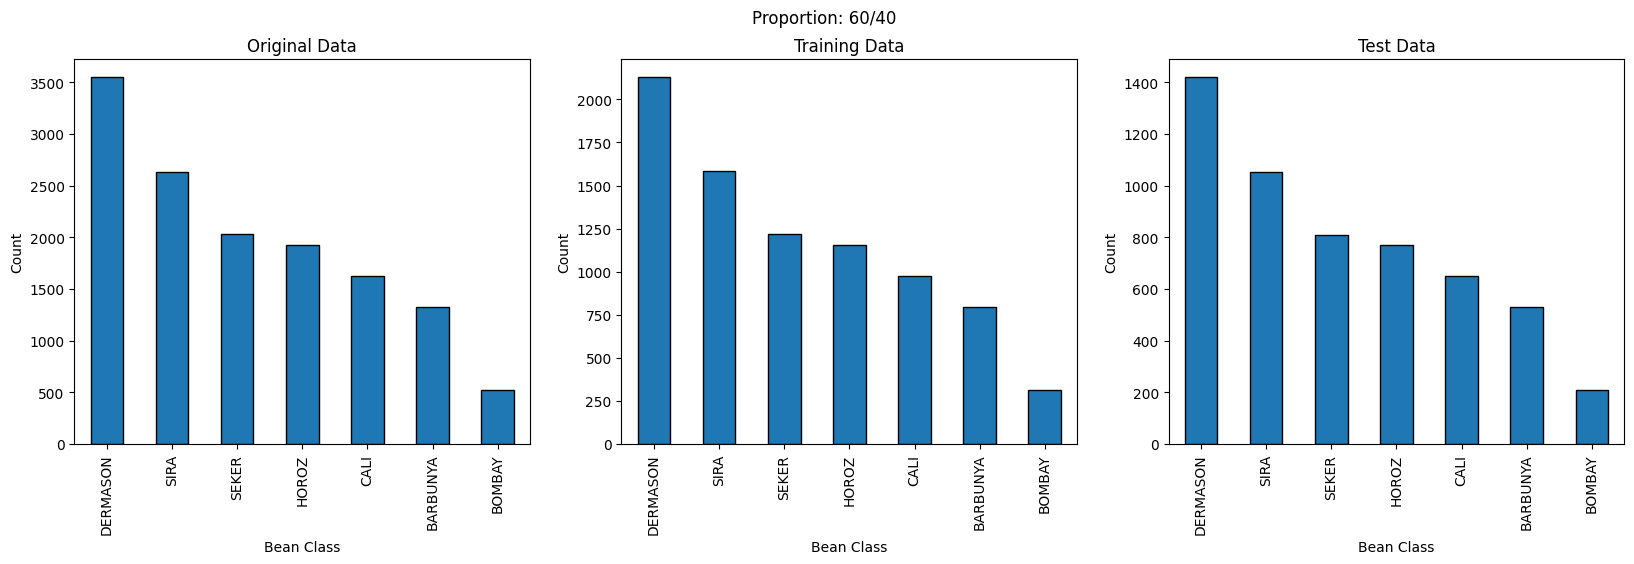

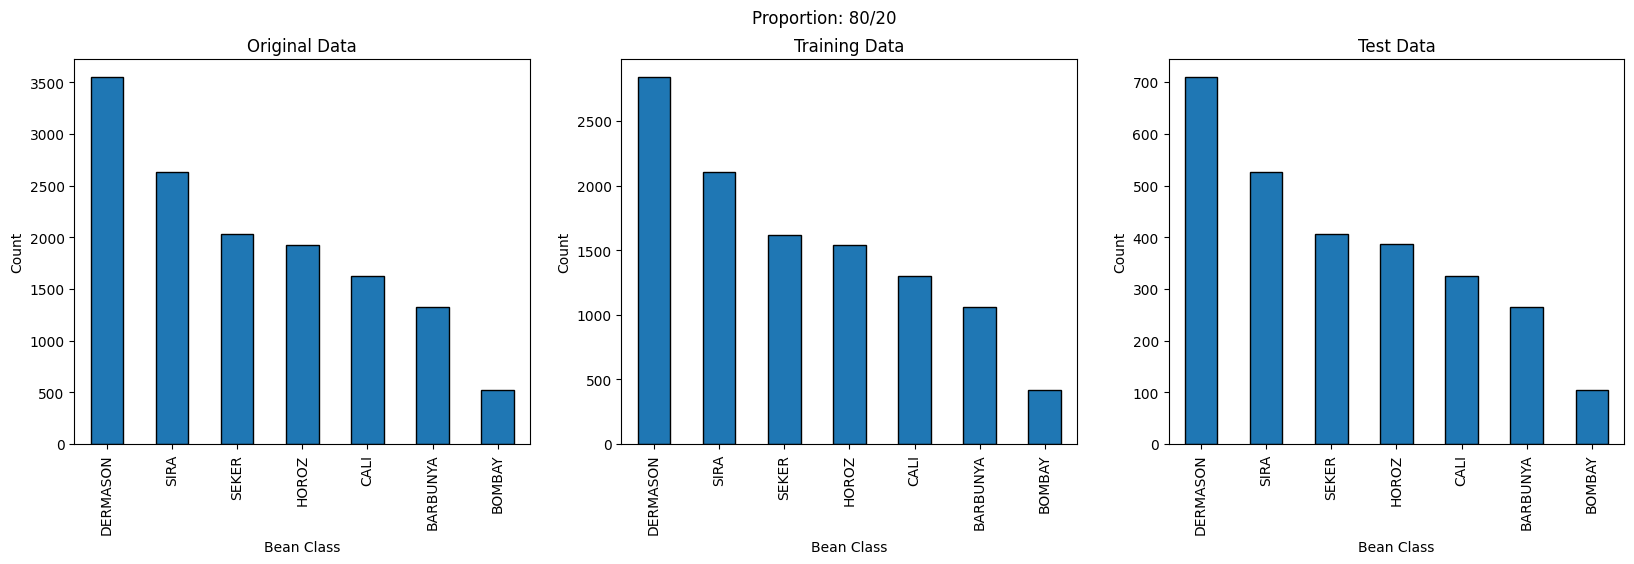

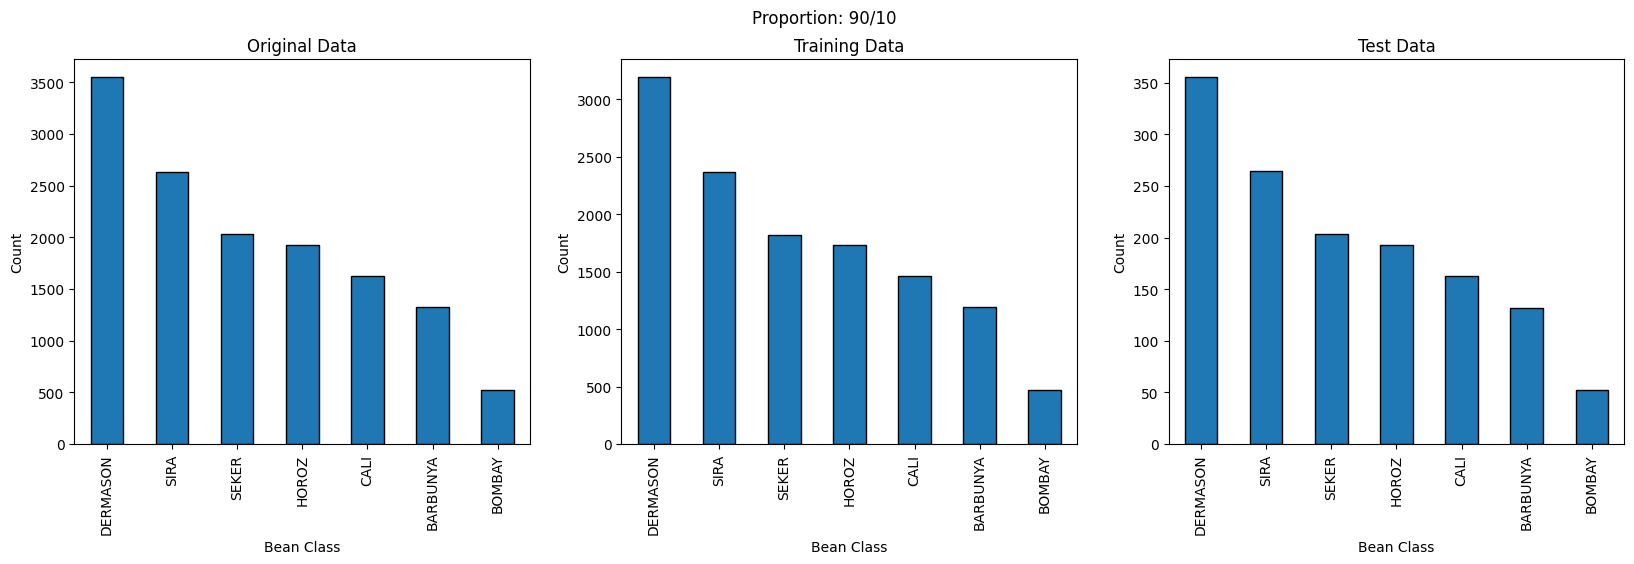

In [14]:
# Change x-axis name to target
for i, (feature_train, label_train, feature_test, label_test) in enumerate(batches):
    plt.figure(figsize=(20, 5))
    plt.suptitle(f'Proportion: {int(proportions[i] * 100)}/{100 - int(proportions[i] * 100)}')

    plt.subplot(1, 3, 1)
    # The default histogram is ugly, so I used bar plot instead
    raw_data['Class'].value_counts().plot(kind = 'bar', edgecolor = 'black')
    plt.title('Original Data')
    plt.xlabel('Bean Class')
    plt.ylabel('Count')

    plt.subplot(1, 3, 2)
    label_train['Class'].value_counts().plot(kind = 'bar', edgecolor = 'black')
    plt.title(f'Training Data')
    plt.xlabel('Bean Class')
    plt.ylabel('Count')

    plt.subplot(1, 3, 3)
    label_test['Class'].value_counts().plot(kind = 'bar', edgecolor = 'black')
    plt.title(f'Test Data')
    plt.xlabel('Bean Class')
    plt.ylabel('Count')
    plt.show()

### Decision Tree Construction
#### 40/60 Proportion

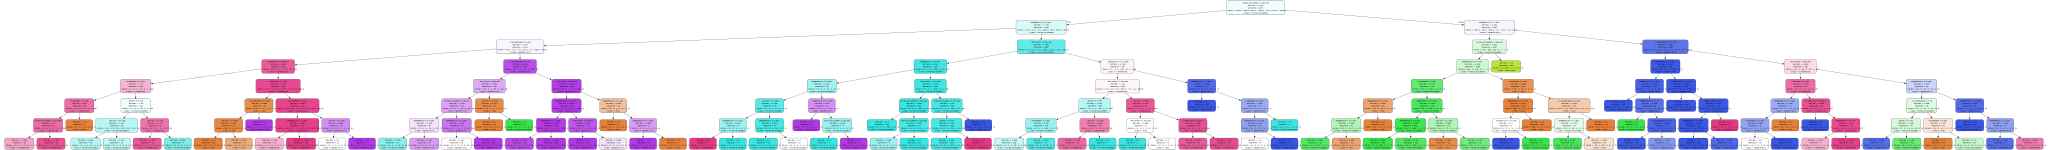

In [15]:
clf_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
clf_1 = clf_1.fit(batches[0][0], batches[0][1])

dot_data = export_graphviz(clf_1, feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

#### 60/40 Proportion

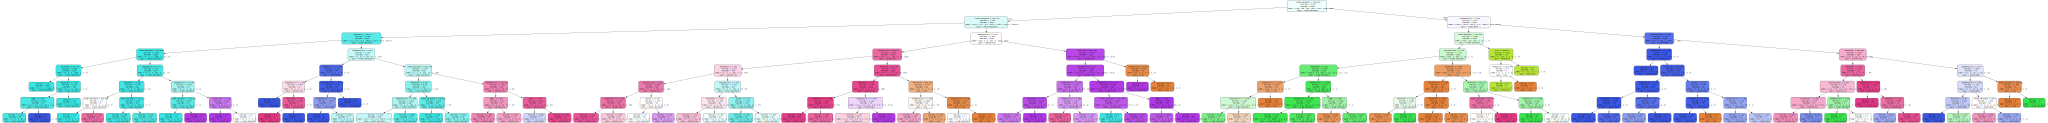

In [16]:
clf_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
clf_2 = clf_2.fit(batches[1][0], batches[1][1])

dot_data = export_graphviz(clf_2, feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

#### 80/20 Proportion

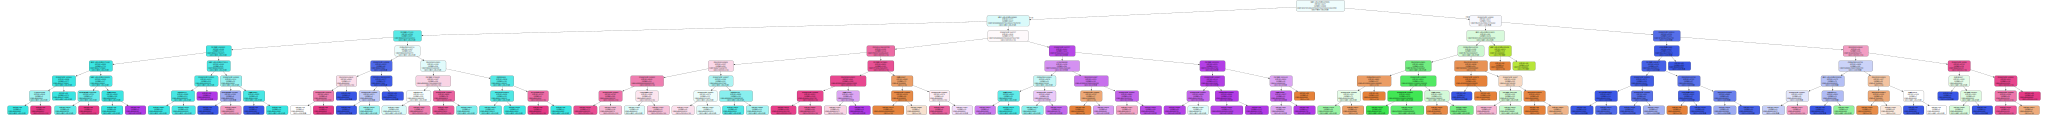

In [17]:
clf_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
clf_3 = clf_3.fit(batches[2][0], batches[2][1])

dot_data = export_graphviz(clf_3, feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

#### 90/10 Proportion

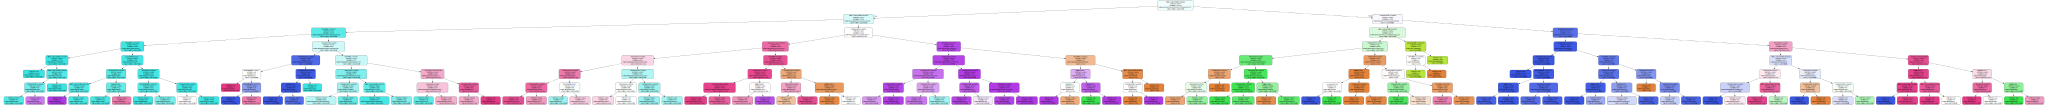

In [18]:
clf_4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
clf_4 = clf_4.fit(batches[3][0], batches[3][1])

dot_data = export_graphviz(clf_4, feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

### Evaluation

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.90      0.89       793
      BOMBAY       1.00      1.00      1.00       313
        CALI       0.91      0.91      0.91       978
    DERMASON       0.87      0.94      0.90      2128
       HOROZ       0.94      0.93      0.94      1157
       SEKER       0.93      0.95      0.94      1216
        SIRA       0.89      0.77      0.82      1582

    accuracy                           0.90      8167
   macro avg       0.92      0.92      0.92      8167
weighted avg       0.90      0.90      0.90      8167



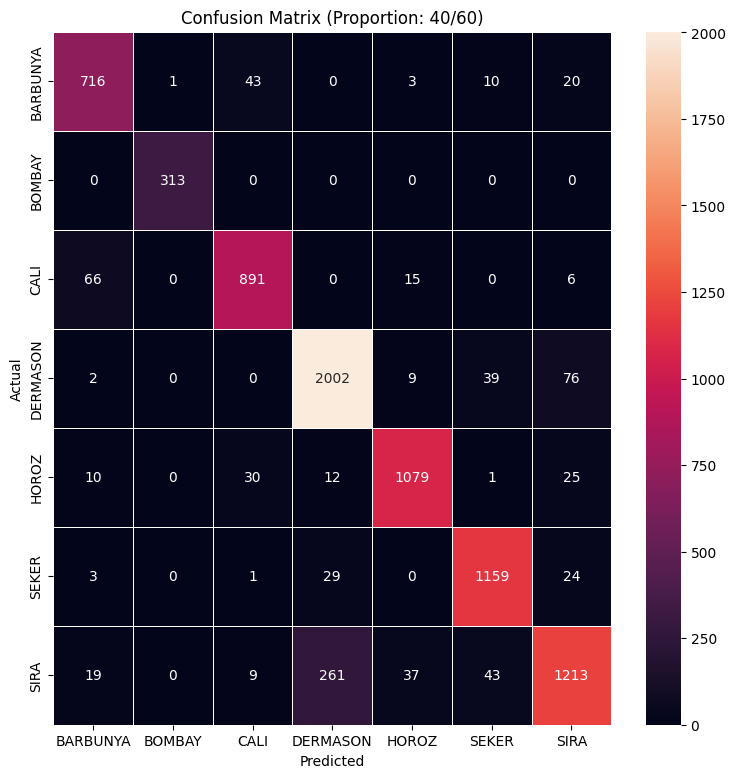

In [19]:
pred_1 = clf_1.predict(batches[0][2])
print(classification_report(batches[0][3], pred_1))
cfm_1 = confusion_matrix(batches[0][3], pred_1)
plt.figure(figsize=(9, 9))
sns.heatmap(cfm_1, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix (Proportion: 40/60)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.78      0.85       529
      BOMBAY       1.00      1.00      1.00       209
        CALI       0.84      0.95      0.89       652
    DERMASON       0.90      0.92      0.91      1419
       HOROZ       0.95      0.92      0.93       771
       SEKER       0.93      0.94      0.93       811
        SIRA       0.84      0.84      0.84      1054

    accuracy                           0.90      5445
   macro avg       0.91      0.91      0.91      5445
weighted avg       0.90      0.90      0.90      5445



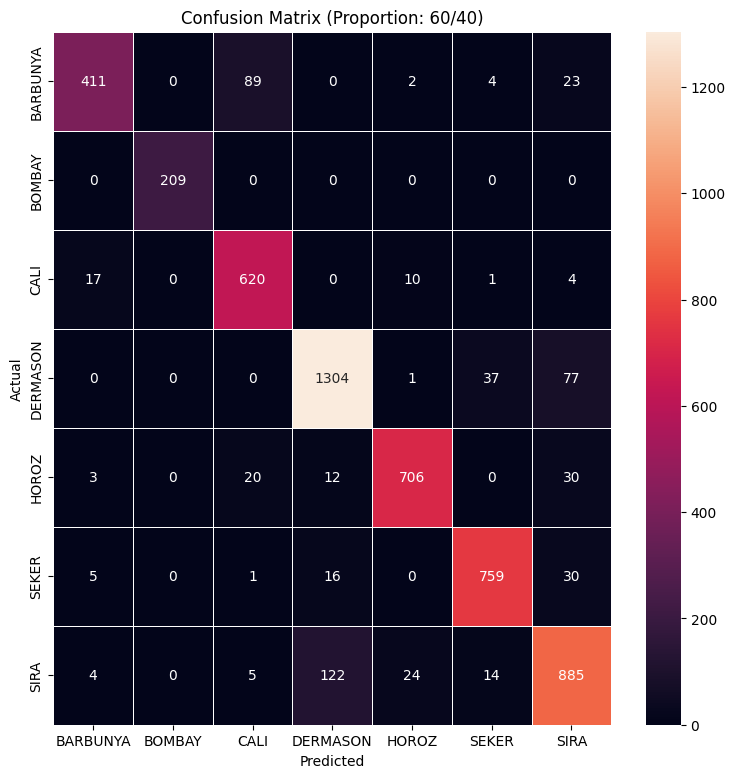

In [20]:
pred_2 = clf_2.predict(batches[1][2])
print(classification_report(batches[1][3], pred_2))
cfm_2 = confusion_matrix(batches[1][3], pred_2)
plt.figure(figsize=(9, 9))
sns.heatmap(cfm_2, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix (Proportion: 60/40)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.85      0.88       265
      BOMBAY       1.00      0.99      1.00       104
        CALI       0.89      0.95      0.92       326
    DERMASON       0.87      0.94      0.90       709
       HOROZ       0.95      0.94      0.94       386
       SEKER       0.97      0.91      0.94       406
        SIRA       0.86      0.82      0.84       527

    accuracy                           0.90      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.90      0.90      2723



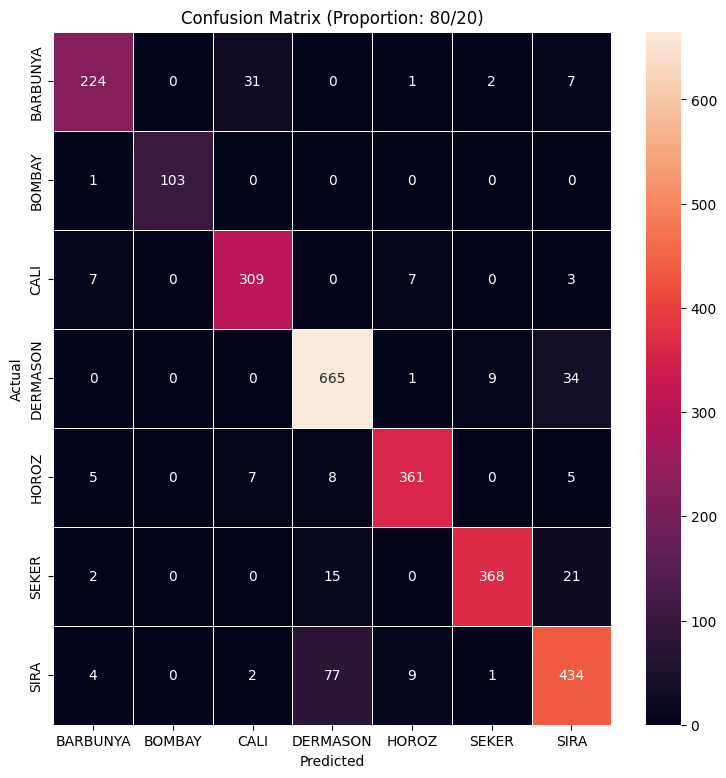

In [21]:
pred_3 = clf_3.predict(batches[2][2])
print(classification_report(batches[2][3], pred_3))
cfm_3 = confusion_matrix(batches[2][3], pred_3)
plt.figure(figsize=(9, 9))
sns.heatmap(cfm_3, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix (Proportion: 80/20)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.89      0.88       132
      BOMBAY       1.00      1.00      1.00        52
        CALI       0.92      0.88      0.90       163
    DERMASON       0.89      0.92      0.90       355
       HOROZ       0.98      0.93      0.96       193
       SEKER       0.95      0.93      0.94       203
        SIRA       0.84      0.86      0.85       264

    accuracy                           0.91      1362
   macro avg       0.92      0.92      0.92      1362
weighted avg       0.91      0.91      0.91      1362



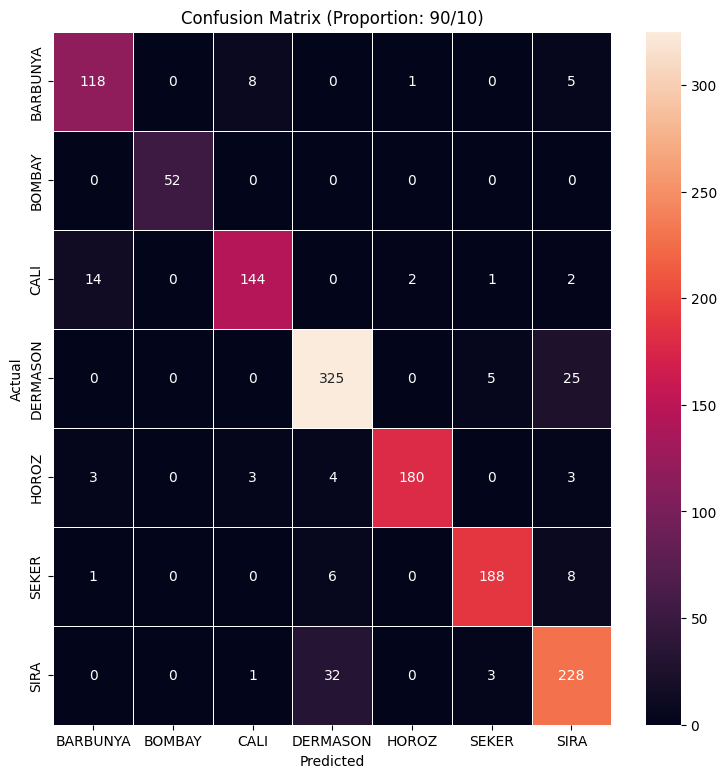

In [22]:
pred_4 = clf_4.predict(batches[3][2])
print(classification_report(batches[3][3], pred_4))
cfm_4 = confusion_matrix(batches[3][3], pred_4)
plt.figure(figsize=(9, 9))
sns.heatmap(cfm_4, annot = True, fmt = 'd', linewidths = 0.5, xticklabels = labels, yticklabels = labels)
plt.title('Confusion Matrix (Proportion: 90/10)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Depth and Accuracy Score

In [23]:
# Depth List
max_depth = [None]
max_depth.extend(list(range(2, 8)))
clf_models = []
fit_time = []
accuracy = []

In [24]:
for depth in max_depth:
    feature_train, feature_test, label_train, label_test = train_test_split(features, targets, train_size = 0.8, stratify = targets,
                                                                            random_state = np.uint64(np.random.rand() * 1024))
    clf_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    model_fit_time_start = time.process_time()
    clf_model = clf_model.fit(feature_train, label_train)
    model_fit_time = time.process_time() - model_fit_time_start
    clf_models.append(clf_model)
    fit_time.append(model_fit_time)
    pred = clf_model.predict(feature_test)
    accuracy.append(accuracy_score(label_test, pred))

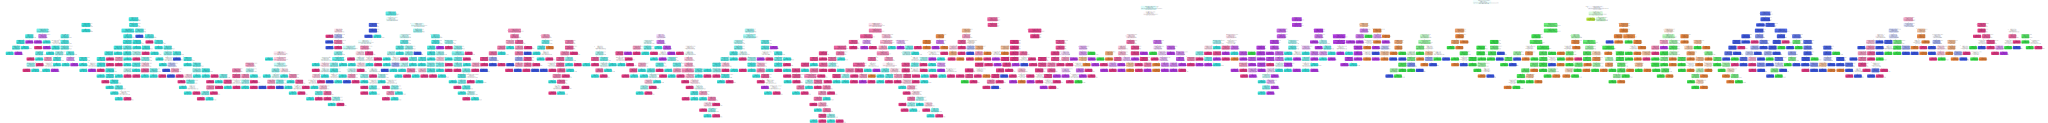

In [25]:
# No Depth Limit
dot_data = export_graphviz(clf_models[0], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

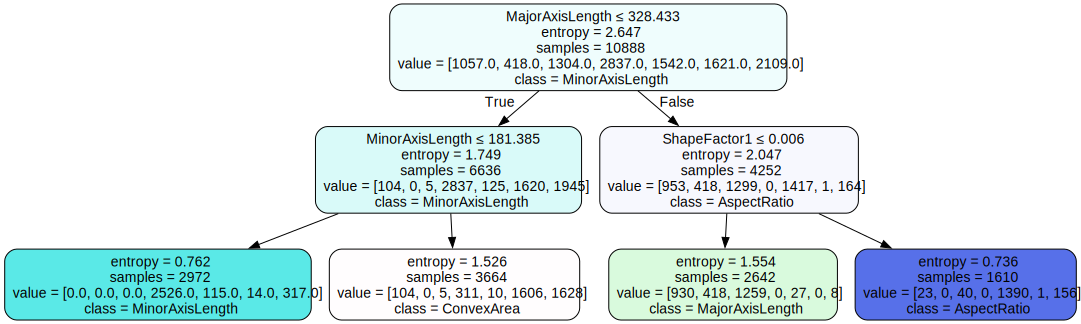

In [26]:
# Depth Limit = 2
dot_data = export_graphviz(clf_models[1], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

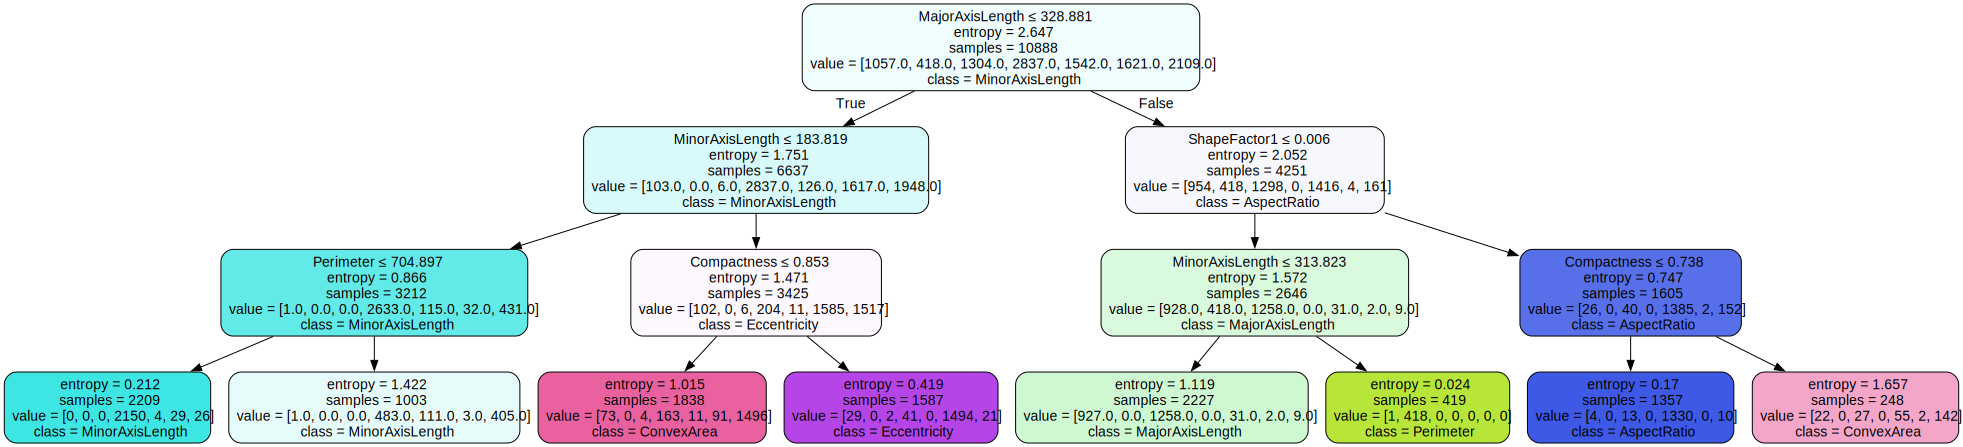

In [27]:
# Depth Limit = 3
dot_data = export_graphviz(clf_models[2], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

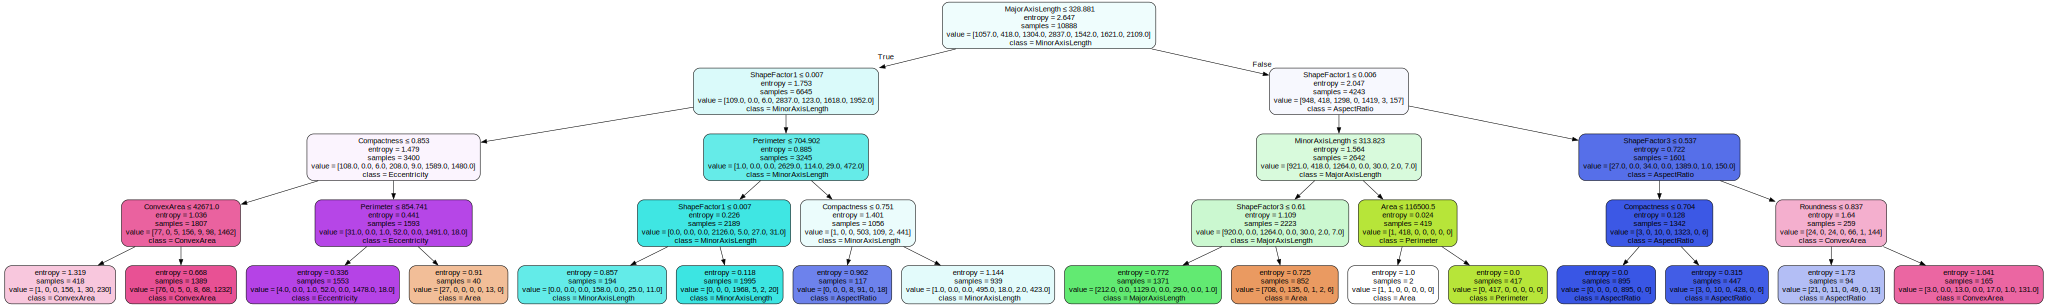

In [28]:
# Depth Limit = 4
dot_data = export_graphviz(clf_models[3], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

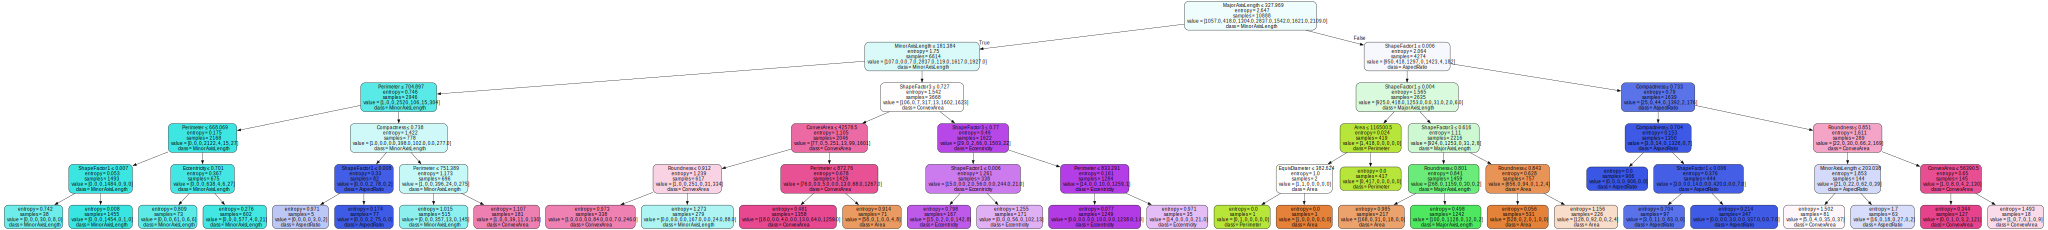

In [29]:
# Depth Limit = 5
dot_data = export_graphviz(clf_models[4], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

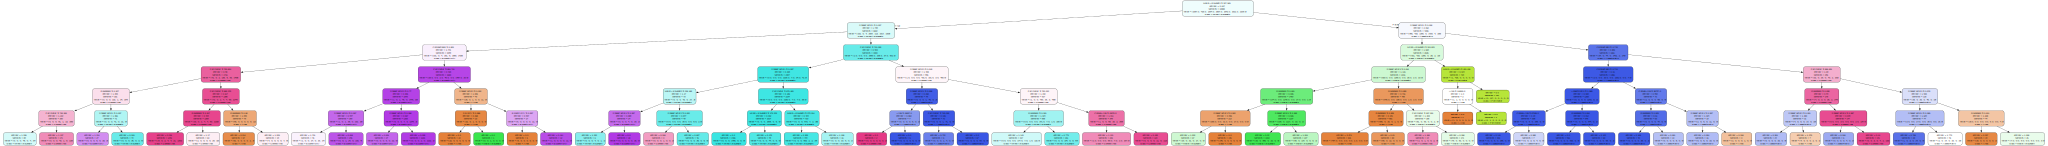

In [30]:
# Depth Limit = 6
dot_data = export_graphviz(clf_models[5], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

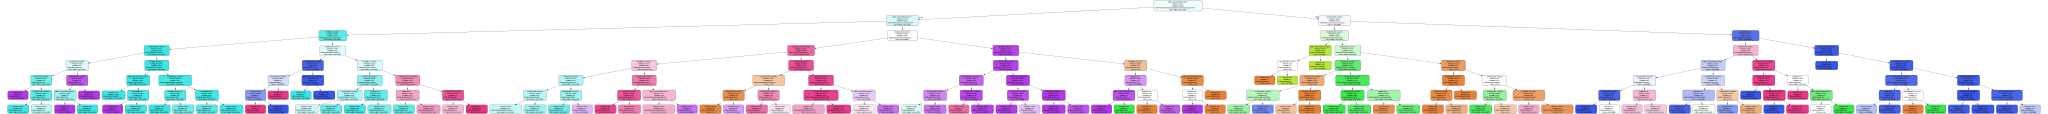

In [31]:
# Depth Limit = 7
dot_data = export_graphviz(clf_models[6], feature_names = features.columns, class_names = features.columns,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
display(graph)

#### Accuracy Table

In [32]:
max_depth[0] = 'None'
accuracy_df = pd.DataFrame({
    'Max Depth': max_depth,
    'Fit Time': fit_time,
    'Accuracy': accuracy
})
accuracy_df[['Max Depth', 'Accuracy']].set_index('Max Depth').T

Max Depth      None        2         3         4         5         6         7
Accuracy   0.890195  0.62321  0.796915  0.857877  0.898641  0.899376  0.908557

#### Fit Time Chart

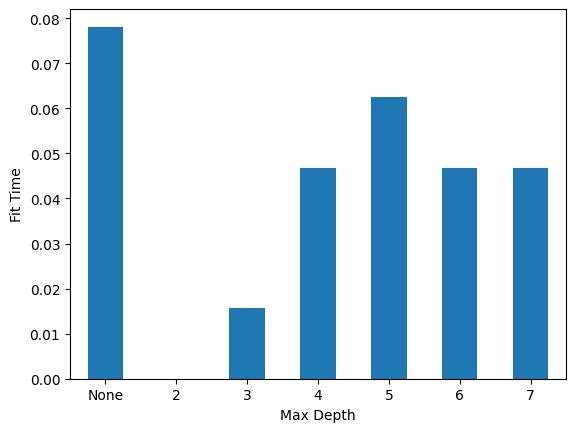

In [33]:
accuracy_df[['Max Depth', 'Fit Time']].plot(x = 'Max Depth', ylabel = 'Fit Time', kind = 'bar', legend = False, rot = 0)
plt.show()